In [ ]:
import torch
from qubosolver.utils import calculate_density, classify_density

In [ ]:
from qubosolver.qubo_instance import QUBOInstance
from qubosolver.qubo_analyzer import QUBOAnalyzer
from qubosolver.data import QUBOSolution

In [ ]:
num_bitstrings=100
bit_length=3

costs = torch.randint(1, 20, (2**bit_length,), dtype=torch.float)

bitstrings = torch.randint(0, 2, (num_bitstrings, bit_length))
bitstrings,counts=bitstrings.unique(dim=0,return_counts=True)
solution1 = QUBOSolution(bitstrings, costs, counts)

bitstrings = torch.randint(0, 2, (num_bitstrings, bit_length))
bitstrings,counts=bitstrings.unique(dim=0,return_counts=True)
solution2 = QUBOSolution(bitstrings, costs, counts)


In [ ]:
# Create the analyzer with our two solutions
analyzer = QUBOAnalyzer([solution1, solution2], labels=["sol1", "sol2"])

In [ ]:
df = analyzer.df
print("Combined DataFrame:")
print(df)

Combined DataFrame:
   labels bitstrings  costs  counts  probs
0    sol1        000    4.0      14   0.14
1    sol1        001    3.0      11   0.11
2    sol1        010   17.0      12   0.12
3    sol1        011   15.0      12   0.12
4    sol1        100   10.0       6   0.06
5    sol1        101    2.0      17   0.17
6    sol1        110    6.0      13   0.13
7    sol1        111    3.0      15   0.15
8    sol2        000    4.0      12   0.12
9    sol2        001    3.0      11   0.11
10   sol2        010   17.0      12   0.12
11   sol2        011   15.0       9   0.09
12   sol2        100   10.0      12   0.12
13   sol2        101    2.0      18   0.18
14   sol2        110    6.0      12   0.12
15   sol2        111    3.0      14   0.14


In [ ]:
filtered_cost_df = analyzer.filter_by_cost(max_cost=10)
print("DataFrame after filtering by cost (<10):")
print(filtered_cost_df)

DataFrame after filtering by cost (<10):
   labels bitstrings  costs  counts  probs
0    sol1        000    4.0      14   0.14
1    sol1        001    3.0      11   0.11
5    sol1        101    2.0      17   0.17
6    sol1        110    6.0      13   0.13
7    sol1        111    3.0      15   0.15
8    sol2        000    4.0      12   0.12
9    sol2        001    3.0      11   0.11
13   sol2        101    2.0      18   0.18
14   sol2        110    6.0      12   0.12
15   sol2        111    3.0      14   0.14


In [ ]:
# Filter by percentage: keep top 10% (lowest cost) bitstrings per solution
filtered_percent_df = analyzer.filter_by_percentage(column="probs",order="descending",top_percent=0.1)
print("DataFrame after filtering by top 10% (by cost):")
filtered_percent_df

DataFrame after filtering by top 10% (by cost):


,labels,bitstrings,costs,counts,probs
0,sol1,101,2.0,17,0.17
1,sol2,101,2.0,18,0.18


In [ ]:
# Filter by probability: choose a threshold (here 0.4, for example)
# (Probabilities are computed from counts for each solution.)
filtered_prob_df = analyzer.filter_by_probability(min_probability=0.01)
print("DataFrame after filtering by probability:")
print(filtered_prob_df)

DataFrame after filtering by probability:
   labels bitstrings  costs  counts  probs
0    sol1        000    4.0      14   0.14
1    sol1        001    3.0      11   0.11
2    sol1        010   17.0      12   0.12
3    sol1        011   15.0      12   0.12
4    sol1        100   10.0       6   0.06
5    sol1        101    2.0      17   0.17
6    sol1        110    6.0      13   0.13
7    sol1        111    3.0      15   0.15
8    sol2        000    4.0      12   0.12
9    sol2        001    3.0      11   0.11
10   sol2        010   17.0      12   0.12
11   sol2        011   15.0       9   0.09
12   sol2        100   10.0      12   0.12
13   sol2        101    2.0      18   0.18
14   sol2        110    6.0      12   0.12
15   sol2        111    3.0      14   0.14


In [ ]:
avg_cost_df = analyzer.average_cost()
print("Average cost for all bitstrings per solution:")
print(avg_cost_df)

print('------------------------------------------------')
avg_cost_df = analyzer.average_cost(0.5)
print("Average cost for top 50% bitstrings per solution:")
print(avg_cost_df)

print('------------------------------------------------')
avg_cost_df = analyzer.average_cost(0.1)
print("Average cost for top 10% bitstrings per solution:")
print(avg_cost_df)
print('------------------------------------------------')
avg_cost_df = analyzer.average_cost(0.01)
print("Average cost for top 1% bitstrings per solution:")
print(avg_cost_df)

Average cost for all bitstrings per solution:
  labels  average cost  bitstrings considered
0   sol1           7.5                      8
1   sol2           7.5                      8
------------------------------------------------
Average cost for top 50% bitstrings per solution:
  labels  average cost  bitstrings considered
0   sol1           3.0                      4
1   sol2           3.0                      4
------------------------------------------------
Average cost for top 10% bitstrings per solution:
  labels  average cost  bitstrings considered
0   sol1           2.0                      1
1   sol2           2.0                      1
------------------------------------------------
Average cost for top 1% bitstrings per solution:
  labels  average cost  bitstrings considered
0   sol1           2.0                      1
1   sol2           2.0                      1


In [ ]:
best_bit_df = analyzer.best_bitstrings()
print("Best bitstring per solution:")
print(best_bit_df)


Best bitstring per solution:
  labels bitstrings  costs  counts  probs
0   sol1        101    2.0      17   0.17
1   sol2        101    2.0      18   0.18


In [ ]:
df_with_gaps = analyzer.calculate_gaps(opt_cost=10)
print("DataFrame after calculating gaps (opt_cost=10):")
print(df_with_gaps)

DataFrame after calculating gaps (opt_cost=10):
   labels bitstrings  costs  counts  probs  gaps
0    sol1        000    4.0      14   0.14   0.6
1    sol1        001    3.0      11   0.11   0.7
2    sol1        010   17.0      12   0.12   0.7
3    sol1        011   15.0      12   0.12   0.5
4    sol1        100   10.0       6   0.06   0.0
5    sol1        101    2.0      17   0.17   0.8
6    sol1        110    6.0      13   0.13   0.4
7    sol1        111    3.0      15   0.15   0.7
8    sol2        000    4.0      12   0.12   0.6
9    sol2        001    3.0      11   0.11   0.7
10   sol2        010   17.0      12   0.12   0.7
11   sol2        011   15.0       9   0.09   0.5
12   sol2        100   10.0      12   0.12   0.0
13   sol2        101    2.0      18   0.18   0.8
14   sol2        110    6.0      12   0.12   0.4
15   sol2        111    3.0      14   0.14   0.7


In [ ]:
# Filter by percentage: keep top 10% (lowest cost) bitstrings per solution
filtered_percent_df = analyzer.filter_by_percentage(column="gaps",top_percent=0.1)
print("DataFrame after filtering by top 10% (by cost):")
print(filtered_percent_df)

DataFrame after filtering by top 10% (by cost):
  labels bitstrings  costs  counts  probs  gaps
0   sol1        100   10.0       6   0.06   0.0
1   sol1        110    6.0      13   0.13   0.4
2   sol2        100   10.0      12   0.12   0.0


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


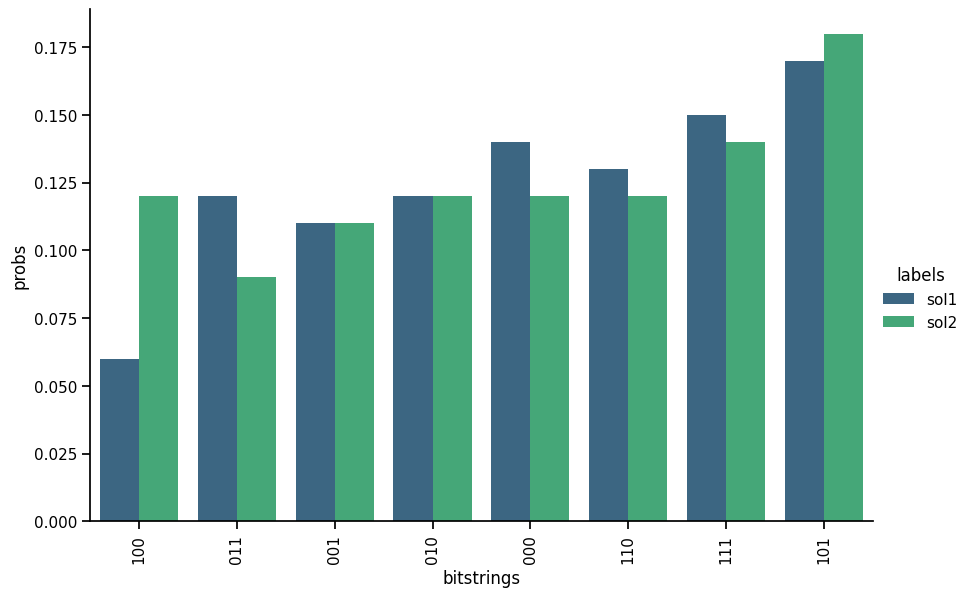

In [ ]:
plot1 = analyzer.plot(
    x_axis="bitstrings",
    y_axis="probs",
    sort_by="probs",
    sort_order="ascending",
    context="notebook"
)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


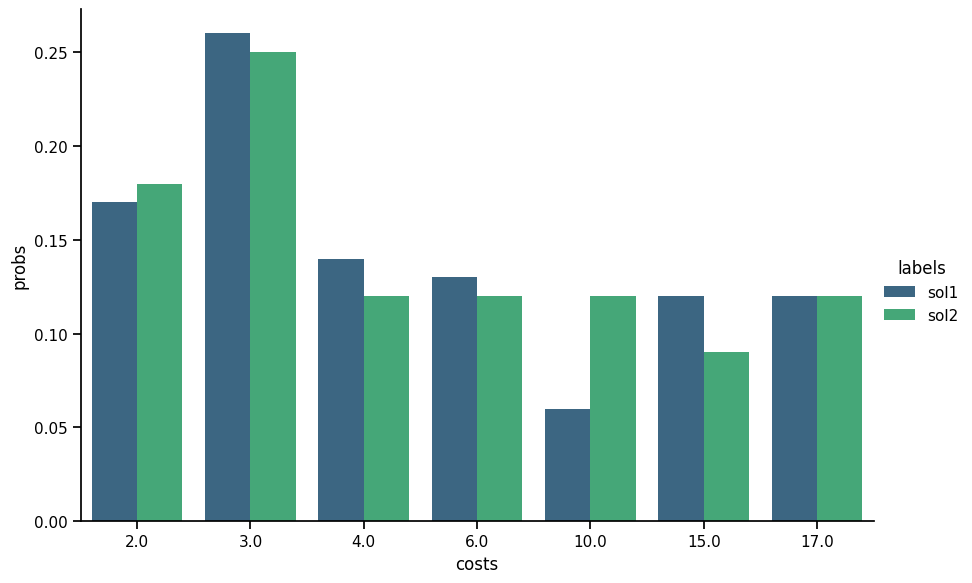

In [ ]:
plot2 = analyzer.plot(
    x_axis="costs",
    y_axis="probs",
    sort_by="costs",
    sort_order="ascending",
    context="notebook"
)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


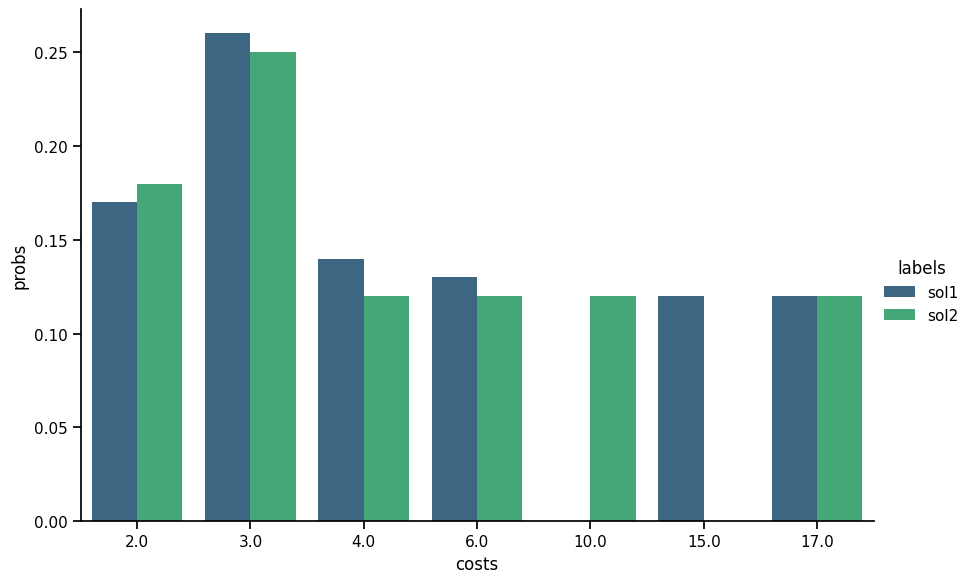

In [ ]:
plot2 = analyzer.plot(
    x_axis="costs",
    y_axis="probs",
    sort_by="costs",
    sort_order="ascending",
    probability_threshold=0.1,
    context="notebook"
)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


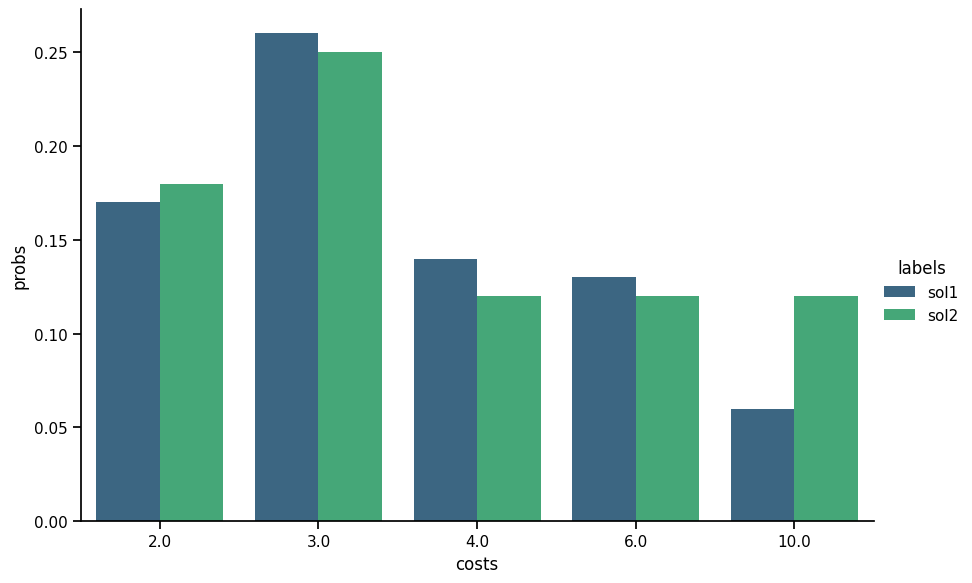

In [ ]:
plot2 = analyzer.plot(
    x_axis="costs",
    y_axis="probs",
    sort_by="costs",
    sort_order="ascending",
    cost_threshold=11,
    context="notebook"
)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


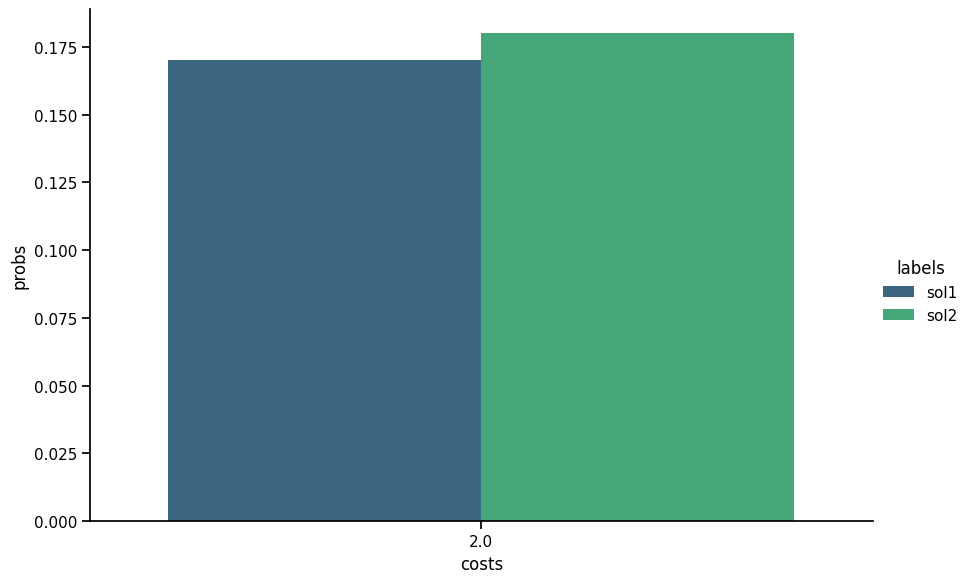

In [ ]:
plot2 = analyzer.plot(
    x_axis="costs",
    y_axis="probs",
    sort_by="costs",
    sort_order="ascending",
    top_percent=0.1,
    context="notebook"
)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


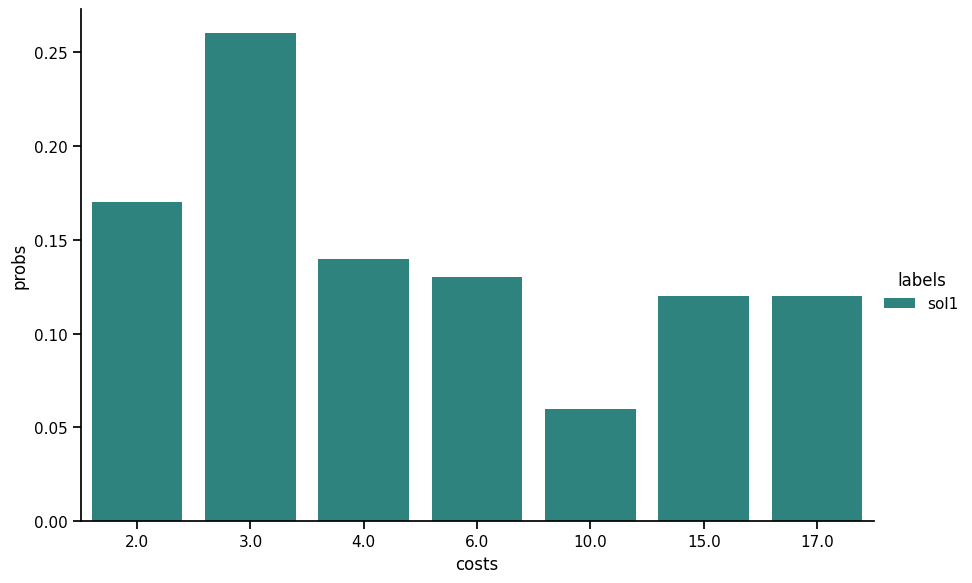

In [ ]:
plot2 = analyzer.plot(
    x_axis="costs",
    y_axis="probs",
    sort_by="costs",
    sort_order="ascending",
    labels=['sol1'],
    context="notebook"
)

In [ ]:
# Create a new solution with different bitstrings and costs
bitstrings = torch.randint(0, 2, (5, bit_length))
bitstrings,counts=bitstrings.unique(dim=0,return_counts=True)
costs = torch.randint(1, 20, (len(bitstrings),), dtype=torch.float)
solution3 = QUBOSolution(bitstrings, costs, counts)

# Create the analyzer with our three solutions
analyzer = QUBOAnalyzer([solution1, solution2, solution3], labels=["sol1", "sol2", "sol3"])

In [ ]:
# Compare the solutions
analyzer.compare_qubo_solutions(["sol1", "sol3"])
print("\n -------------------------------------- \n")
analyzer.compare_qubo_solutions(["sol1", "sol2"])

Comparing two lists of bitstrings:
1. sol1: 8 bitstrings (8 unique strings)
2. sol3: 4 bitstrings (4 unique strings)

Bitstrings in sol1 not present in sol3:
- 001
- 110
- 101
- 100

Ratio of different bitstrings: 4/8 = 50%

 -------------------------------------- 

Comparing two lists of bitstrings:
1. sol1: 8 bitstrings (8 unique strings)
2. sol2: 8 bitstrings (8 unique strings)

The lists contain exactly the same bitstrings.
